In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("/content/placement.csv")

In [3]:
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
data.shape

(100, 4)

In [9]:
data = data.drop(columns=['Unnamed: 0'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [12]:
import matplotlib.pyplot as plt


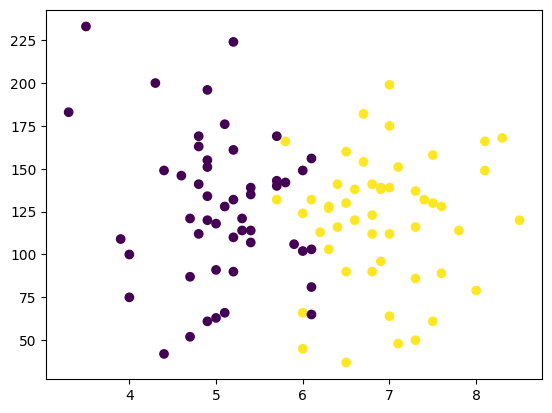

In [14]:
plt.scatter(data['cgpa'],data['iq'],c=data['placement'])

In [16]:
#Divided input and output variable
X = data.iloc[:,0:2]
Y = data.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
#Train test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=140)

In [21]:
X_train

,cgpa,iq
2,5.3,121.0
12,5.4,139.0
91,7.5,158.0
76,4.9,155.0
4,5.8,142.0
...,...,...
80,4.9,196.0
77,7.3,50.0
22,4.9,120.0
23,4.7,87.0


In [22]:
X_test

,cgpa,iq
64,7.0,64.0
9,5.1,66.0
98,6.3,103.0
29,7.0,112.0
60,6.9,139.0
39,4.6,146.0
1,5.9,106.0
43,6.8,141.0
90,7.3,86.0
42,7.6,89.0


In [23]:
Y_train

2     0
12    0
91    1
76    0
4     0
     ..
80    0
77    1
22    0
23    0
38    1
Name: placement, Length: 90, dtype: int64

In [24]:
Y_test

64    1
9     0
98    1
29    1
60    1
39    0
1     0
43    1
90    1
42    1
Name: placement, dtype: int64

In [25]:
# Scaling the values
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_train

array([[-0.55752739, -0.11468316],
       [-0.47041374,  0.33191952],
       [ 1.35897301,  0.80333347],
       [-0.90598201,  0.72889969],
       [-0.12195912,  0.40635331],
       [ 1.44608667,  0.05899566],
       [-1.42866394,  1.84540639],
       [-0.90598201, -1.60335877],
       [ 1.62031398, -0.28836198],
       [ 0.13938185,  0.1582407 ],
       [ 0.66206378,  1.39880371],
       [-1.08020932, -1.82666011],
       [ 1.88165494,  0.58003213],
       [ 1.88165494,  1.00182355],
       [-0.20907277,  0.43116457],
       [ 0.92340474,  1.22512489],
       [-2.12557317,  2.66417798],
       [-0.81886835, -1.55373625],
       [ 0.05226819, -0.04024938],
       [ 0.57495012,  0.30710826],
       [ 0.13938185,  0.75371095],
       [ 0.92340474,  1.82059513],
       [ 0.13938185, -0.56128584],
       [ 0.48783647, -0.88383222],
       [-1.08020932, -0.11468316],
       [ 1.1847457 ,  0.282297  ],
       [ 0.83629108,  0.30710826],
       [-0.55752739, -0.28836198],
       [ 2.23010956,

In [29]:
X_test = scaler.fit_transform(X_test)

In [30]:
X_test

array([[ 0.59498588, -1.45613041],
       [-1.46041988, -1.38544447],
       [-0.16226888, -0.07775454],
       [ 0.59498588,  0.2403322 ],
       [ 0.48680663,  1.19459243],
       [-2.00131613,  1.44199322],
       [-0.59498588,  0.02827438],
       [ 0.37862738,  1.26527837],
       [ 0.91952363, -0.67858505],
       [ 1.24406138, -0.57255613]])

In [33]:
#Train the Model
from sklearn.linear_model import LogisticRegression

In [34]:
soumike = LogisticRegression()

In [35]:
# Model  training
soumike.fit(X_train,Y_train)

LogisticRegression()

In [47]:
# Predict the Result
Y_pred=soumike.predict(X_test)

In [48]:
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [49]:
Y_test

64    1
9     0
98    1
29    1
60    1
39    0
1     0
43    1
90    1
42    1
Name: placement, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [60]:
# Check Accuracy
accuracy_score(Y_test,Y_pred)

0.9

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(Y_test,Y_pred)

array([[3, 0],
       [1, 6]])

In [66]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

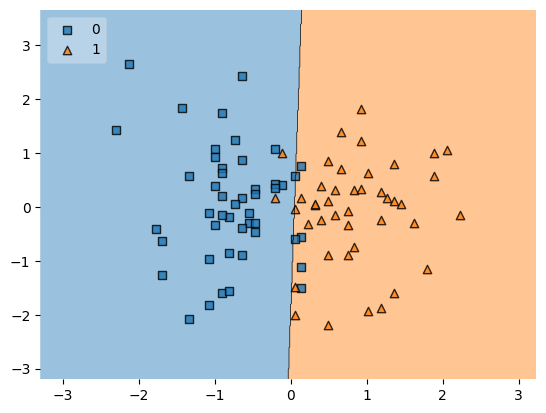

In [68]:
plot_decision_regions(X_train,Y_train.values,clf=soumike,legend=2)

In [69]:
import pickle

In [70]:
pickle.dump(soumike,open('model.pkl','wb'))

In [7]:
#steps
# 1.Preprocess + EDA + Feature Selection
# 2.Extract input and output cols
# 3.Scale the values
# 4.Train test split
# 5.Train the model
# 6.Evaluate the model / model Selection
# 7.Deploy the model